## Lab 2 SIFT, change scale, matching, rotation

zID: z5383372

Name: Pinheng Chen

### Instructions:
A well-known algorithm in computer vision to detect and describe local features in images is
the scale-invariant feature transform (SIFT). Its applications include object recognition,
mapping and navigation, image stitching, 3D modelling, object tracking, and others.
A SIFT feature of an image is a salient keypoint with an associated descriptor. SIFT
computation is commonly divided into two steps:
1) detection,
2) description.
At the end of the detection step, for each keypoint the SIFT algorithm computes the:
• keypoint spatial coordinates (x, y),
• keypoint scale (in the scale space),
• keypoint dominant orientation.
The lab files should be submitted online.
Instructions for submission will be posted closer to the deadline.
Deadline for submission is Week 4, Thursday 6 October 2022, 13:00:00. 
The subsequent description step computes a distinctive 128-dimensional feature vector for
each keypoint. SIFT is designed in such a way that this descriptive feature vector is invariant
to scaling and rotation. Moreover, the algorithm offers decent robustness to noise,
illumination gradients, and affine transformations.

### Reference documents:
1. 2D Features Framework:
https://docs.opencv.org/4.6.0/da/d9b/group__features2d.html
2. Drawing Functions of Keypoints and Matches
https://docs.opencv.org/4.6.0/d4/d5d/group__features2d__draw.html
3. Descriptor Matchers
https://docs.opencv.org/4.6.0/d8/d9b/group__features2d__match.html
4. OpenCV SIFT Class reference
https://docs.opencv.org/4.6.0/d7/d60/classcv_1_1SIFT.html
5. Refer to the following page to understand image features and various feature detectors:
https://docs.opencv.org/4.6.0/db/d27/tutorial_py_table_of_contents_feature2d.html
6. Also, refer to the following example of computing SIFT features and showing the keypoints:
https://docs.opencv.org/4.6.0/da/df5/tutorial_py_sift_intro.html
7.And finally see this page for an example of feature matching:
https://docs.opencv.org/4.6.0/dc/dc3/tutorial_py_matcher.html

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [1]:
import math
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.6.0'

In [3]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [4]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

### Note: 
The getRotationMatrix2D() function is going to rotate image in a counter-clockwise way.

In [5]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Village.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

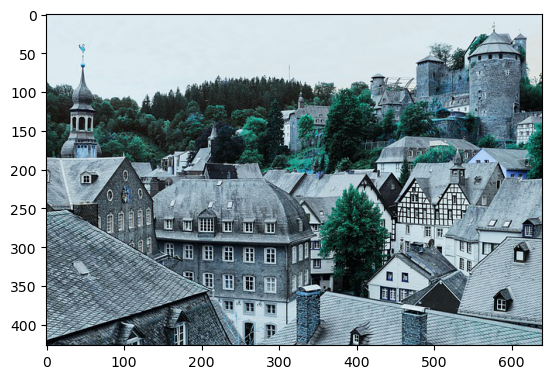

In [6]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
img_path = "Village.png"
img = cv2.imread(img_path)
sft = SiftDetector
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray scale

Number of Keypoints =  2597


True

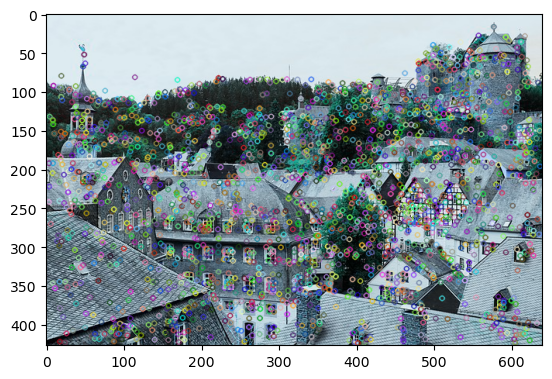

In [7]:
# 1(a) with default parameters
params_1a = None
img_sift_1a = sft.get_detector(img,params_1a) # create SIFT with default parameters
img_1a = img.copy() # copy the original image

keypoints_1a, descriptors_1a = img_sift_1a.detectAndCompute(img,None) # get feature points and descriptor
img_1 = cv2.drawKeypoints(img_1a, keypoints_1a, img_1a) # show the keypoints on the original image

plt.imshow(img_1a)
print("Number of Keypoints = ", len(keypoints_1a))
cv2.imwrite("img_1a_keypoints.png", img_1a)

Note: When using the default parameters, we can get 2597 keypoints.

Number of Keypoints =  237


True

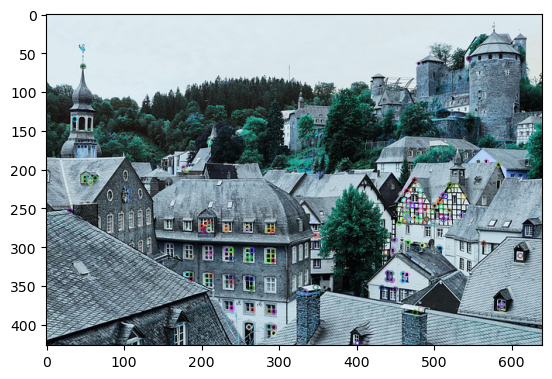

In [8]:
# 1(b)
params_1b = {"n_features":260, 
          "n_octave_layers":3, 
          "contrast_threshold":0.24, 
          "edge_threshold":10, 
          "sigma":1.6}
img_sift_1b = sft.get_detector(img,params_1b)
img_1b = img.copy() # copy the original image

keypoints_1b, descriptors_1b = img_sift_1b.detectAndCompute(img, None) # get feature points and descriptor
img_1b = cv2.drawKeypoints(img_1b, keypoints_1b, img_1b) # show the keypoints on the original image

plt.imshow(img_1b)
print("Number of Keypoints = ", len(keypoints_1b))
cv2.imwrite("img_1b_keypoints.png", img_1b)

Note: According to 1(a), we shoult reduce the number of keypoints from 2597 to around 260, so we set the "n_features" as 260 to get 260 keypoints. Then in order to get proper keypoints, we should varify the "contrast_threshold". When setting the "contrast_threshold" as 0.24, we can get 237 keypoints, and these keypoints will locate in the position of windows, cross of the dome and chimneys.

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


In [9]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.
# 2(a)
img2_original = img.copy()
img2_enlarged = img.copy()
size_origin = img.shape
rows, colomns, channels = size_origin
size_enlarge = (int(colomns*1.2), int(rows*1.2)) # get the tuple of size (colomn, row)
print("Original size: ",size_origin)
print("Enlarged size: ", size_enlarge)

img2_enlarged = cv2.resize(img2_enlarged, size_enlarge) # enlarge the image 
gray2 = cv2.resize(gray.copy(), size_enlarge)

Original size:  (427, 640, 3)
Enlarged size:  (768, 512)


Number of Keypoints =  132


True

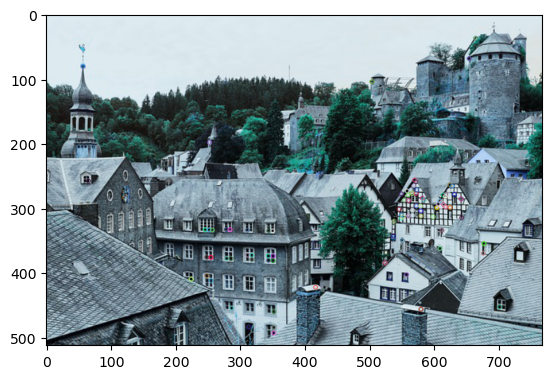

In [10]:
# 2(b)
params_2b = {"n_features":260, 
          "n_octave_layers":3, 
          "contrast_threshold":0.24, 
          "edge_threshold":10, 
          "sigma":1.6}
img2_enlarged_sift_2b = sft.get_detector(img2_enlarged,params_2b)
img_2b = img2_enlarged.copy() # copy the original enlarged image

keypoints_2b, descriptors_2b = img2_enlarged_sift_2b.detectAndCompute(img2_enlarged, None) # get feature points and descriptor
img_2b = cv2.drawKeypoints(img_2b, keypoints_2b, img_2b) # show the keypoints on the original enlarged image

plt.imshow(img_2b)
print("Number of Keypoints = ", len(keypoints_2b))
cv2.imwrite("img_2b_keypoints.png", img_2b)

#### 2(c) Answer:
Most of keypoints are simmilar to original image, when comparing the enlarged image. But the number of keypoints reduce to 132 from 237. This implies that most features will not be affected by the size of the image when appling SIFT.


True

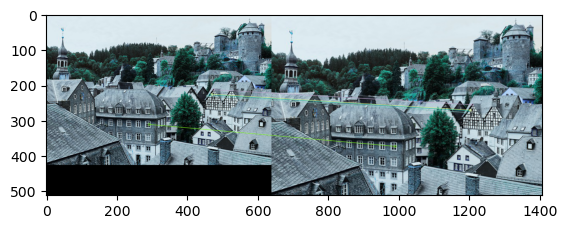

In [11]:
# 2(d)
# Create the BFMatcher object
bf_matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True) # see details in the following note
matches = bf_matcher.match(descriptors_1b, descriptors_2b) # start to match
matches = sorted(matches, key = lambda x:x.distance) # sort them in the order of their distance.
# draw the first 5 matches
img_2d = cv2.drawMatches(img.copy(), keypoints_1b, img2_enlarged.copy(), keypoints_2b, matches[:5], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_2d)
cv2.imwrite("img_2d_matching.png", img_2d)

### NOTE: 
1. In BFMatcher(normType, crossCheck) 
    (1) The parameter named normType = NORM_L1 or NORM_L2 are preferable choices for SIFT and SURF, it tells the BFMatcher how to compute the distance between 2 features. NORM_L1           is faster, NORM_L2 is more accurate.
    (2) The parameter named crossCheck, if false, default BFMatcher behaviourr when it finds the k-nearest neighbors for each query descriptor. 
    If true, the knnMatch() method with k=1 will only return pairs (i,j) such that for i-th query descriptor the j-th descriptor in the matcher's collection is the nearest and vice versa(i.e. BFMatcher will only return consistent pairs), this usually get best results with minimal number of outliers when there are enough matches, and is alternative to the ratio test, used by D.Lowe in SIFT paper.

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 65 degrees and separately also by 125 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

True

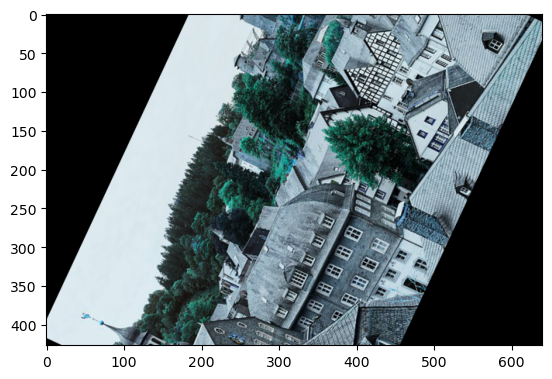

In [12]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.
# 3(a)
img3 = img.copy()
center = get_img_center(img3)
height = center[0]
width = center[1]
img3_anticlk65 = rotate(img3, width, height, 65) # rotate image counter-clockwise by 65 degrees
plt.imshow(img3_anticlk65)
cv2.imwrite("img3_anticlk65.png",img3_anticlk65)

True

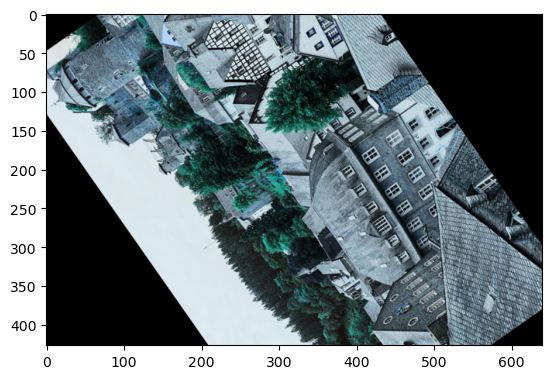

In [13]:
img3_anticlk125 = rotate(img3, width, height, 125) # rotate image counter-clockwise by 125 degrees
plt.imshow(img3_anticlk125)
cv2.imwrite("img3_anticlk125.png",img3_anticlk125)

Number of Keypoints =  119


True

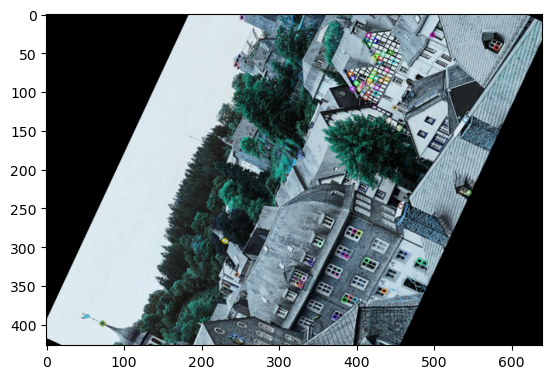

In [14]:
# 3(b)
# for 65 degrees rotated image
params_3b = {"n_features":260, 
          "n_octave_layers":3, 
          "contrast_threshold":0.24, 
          "edge_threshold":10, 
          "sigma":1.6}
img_sift_3b65 = sft.get_detector(img3_anticlk65,params_3b)
img_3b65 = img3_anticlk65.copy() # copy the original 65 degrees rotated image

keypoints_3b65, descriptors_3b65 = img_sift_3b65.detectAndCompute(img3_anticlk65, None) # get feature points and descriptor
img_3b65 = cv2.drawKeypoints(img_3b65, keypoints_3b65, img_3b65) # show the keypoints on the original image

plt.imshow(img_3b65)
print("Number of Keypoints = ", len(keypoints_3b65))
cv2.imwrite("img_3banti65_keypoints.png", img_3b65)

Number of Keypoints =  127


True

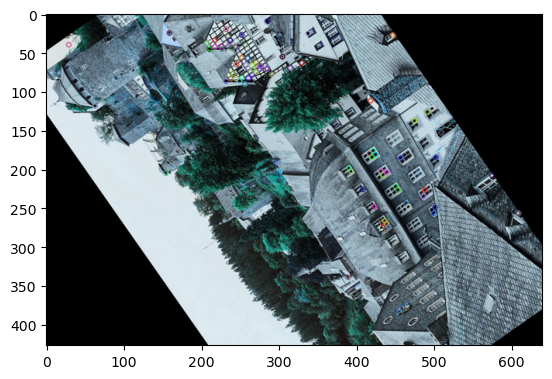

In [15]:
# for 125 degrees rotated image
params_3b = {"n_features":260, 
          "n_octave_layers":3, 
          "contrast_threshold":0.24, 
          "edge_threshold":10, 
          "sigma":1.6}
img_sift_3b125 = sft.get_detector(img3_anticlk125,params_3b)
img_3b125 = img3_anticlk125.copy() # copy the original 65 degrees rotated image

keypoints_3b125, descriptors_3b125 = img_sift_3b125.detectAndCompute(img3_anticlk125, None) # get feature points and descriptor
img_3b125 = cv2.drawKeypoints(img_3b125, keypoints_3b125, img_3b125) # show the keypoints on the original image

plt.imshow(img_3b125)
print("Number of Keypoints = ", len(keypoints_3b125))
cv2.imwrite("img_3banti125_keypoints.png", img_3b125)

### 3(c) Answer:
Yes, these keypoints of the rotated image are roughly simillar to those of the original image. This impies that the SIFT will not be affected by the orientation of the image, in other words, these features will not be changed when the image is rotated.

True

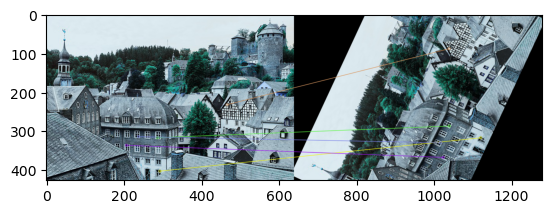

In [16]:
# 3(d)
# For 65 degrees rotated image
# Create the BFMatcher object
matches_3d65 = bf_matcher.match(descriptors_1b, descriptors_3b65) # start to match
matches_3d65 = sorted(matches_3d65, key = lambda x:x.distance) # sort them in the order of their distance.
# draw the first 5 matches
img_3d65 = cv2.drawMatches(img.copy(), keypoints_1b, img3_anticlk65.copy(), keypoints_3b65, matches_3d65[:5], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_3d65)
cv2.imwrite("img_3danti65_matching.png", img_3d65)

True

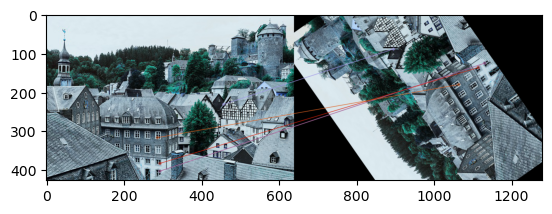

In [17]:
# For 125 degrees rotated image
# Create the BFMatcher object
matches_3d125 = bf_matcher.match(descriptors_1b, descriptors_3b125) # start to match
matches_3d125 = sorted(matches_3d125, key = lambda x:x.distance) # sort them in the order of their distance.
# draw the first 5 matches
img_3d125 = cv2.drawMatches(img.copy(), keypoints_1b, img3_anticlk125.copy(), keypoints_3b125, matches_3d125[:5], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_3d125)
cv2.imwrite("img_3danti125_matching.png", img_3d125)